# Análise de dados da Avaliação dos planos de saúde suplementar da ANS

## O que é o IDSS?
Índice de Desempenho da Saúde Suplementar (IDSS)

Um panorama completo sobre o desempenho de todas as operadoras do país.

O IDSS é um índice composto por um conjunto de indicadores agrupados em quatro dimensões e é calculado com base nos dados extraídos dos sistemas de informações da ANS  ou coletados nos sistemas nacionais de informação em saúde.

Feita todos os anos em âmbito nacional, a avaliação que gera como resultado o IDSS (Índice de Desempenho da Saúde Suplementar) conta com 32 indicadores, divididos em 4 grandes dimensões: Qualidade em Atenção à Saúde, Garantia de Acesso, Sustentabilidade de Mercado e, por fim, Gestão de Processos e Regulação. A nota de cada um desses indicadores varia entre 0,0000 a 1,0000.

O IDSS permite a comparação entre operadoras, estimulando a disseminação de informações de forma transparente e a redução da assimetria de informação, falha de mercado que compromete a capacidade do consumidor de fazer suas escolhas no momento da contratação ou troca de um plano de saúde e a ampliação da concorrência baseada em valor no setor.

A avaliação é retroativa, ou seja, em 2023 são publicados os índices obtidos pela avaliação feita no ano anterior (ano-base: 2022).


IDSS da operadora 2023 (ano-base 2022) 

## Indicadores
1) IDQS - QUALIDADE EM ATENÇÃO À SAÚDE -
Avaliação do conjunto de ações em saúde que contribuem para o atendimento das necessidades de saúde dos
beneficiários, com ênfase nas ações de promoção, prevenção e assistência à saúde prestada.

2) IDGA - GARANTIA DE ACESSO - Condições relacionadas à rede assistencial que possibilitam a garantia de acesso, abrangendo a oferta de rede de prestadores.

3) IDSM - SUSTENTABILIDADE NO MERCADO -
Monitoramento da sustentabilidade da operadora, considerando seu equilíbrio econômico-financeiro,
passando pela satisfação do beneficiário e compromissos com prestadores.


4) IDGR - GESTÃO DE PROCESSOS E REGULAÇÃO-
Entre outros indicadores, essa dimensão afere o cumprimento das obrigações técnicas e cadastrais das operadoras junto à ANS.

### Os valores dos indicadores variam de 0 (pior) a 1 (melhor)

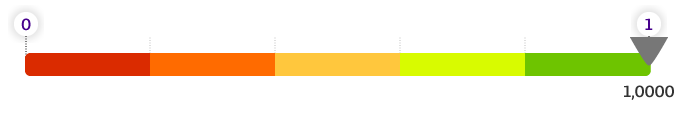

### Base de Dados só tem as coluans de razão social, cnpj, modalidade e notas

In [1]:
# importando as bibliotecas python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ler o arquivo CSV
df = pd.read_csv('historico_idss.csv', delimiter=';')

In [3]:
# Substituir "ND" e "<NA>" por NaN para facilitar a remoção
df.replace(["ND", "<NA>"], np.nan, inplace=True)

# Definir as 5 últimas colunas dos dados do ultimo período (2023-2022)
columns_to_check = ["IDSS 2023_2022", "IDQS 2023_2022", "IDGA 2023_2022", "IDSM 2023_2022", "IDGR 2023_2022"]

# Remover as linhas onde qualquer uma dessas colunas tenha valor NaN e assim só ter os planos que estão ativos
df_cleaned = df.dropna(subset=columns_to_check)

In [4]:
# Definir as colunas que tinham as notas em forma de intervalo para não ter problema ao realizar as visualziações
columns_to_drop = ["IDSS 2009_2008", "IDSS 2010 _2009", "IDSS 2011_2010", "IDAS 2011_2010",
                   "IDEO 2011_2010", "IDEF 2011_2010", "IDSB 2011_2010"]

# Excluir as colunas indesejadas
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [5]:
# Identificar quais colunas devem ser convertidas para float
columns_to_convert = df_cleaned.columns[4:]

# Substituir vírgulas por pontos e converter para float
for column in columns_to_convert:
    df_cleaned[column] = df_cleaned[column].str.replace(',', '.').astype(float)

### Identificando as modalidades de empresas mais comuns

In [6]:
df_cleaned['Modalidade'].value_counts()

Modalidade
Cooperativa Médica                   259
Medicina de Grupo                    188
Odontologia de Grupo                 126
Autogestão                           110
Cooperativa odontológica              94
Filantropia                           31
Autogestão por RH                     23
Seguradora Especializada em Saúde      8
Name: count, dtype: int64

In [7]:
#Criando um dataframe para analisar o IDSS

# Selecionar as quatro primeiras colunas
first_four_columns = df_cleaned.iloc[:, :4]

# Selecionar todas as colunas que começam com "IDSS"
idss_columns = df_cleaned.filter(regex='^IDSS')

# Concatenar os dois dataFrames
df_idss = pd.concat([first_four_columns, idss_columns], axis=1)

In [8]:
# Encontrar os 10 maiores valores de "IDSS 2023_2022"
top_10_idss = df_idss.nlargest(10, 'IDSS 2023_2022')

#Vendo as empresas no top 10 de avaliação no ultimo ano

In [9]:
top_10_idss.iloc[:, [2,3, 15]]

,Razao Social,Modalidade,IDSS 2023_2022
10,BRADESCO SAÚDE S.A.,Seguradora Especializada em Saúde,1.0
53,UNIMED LITORAL COOPERATIVA DE TRABALHO MÉDICO ...,Cooperativa Médica,1.0
57,CENTRO TRASMONTANO DE SAO PAULO,Medicina de Grupo,1.0
97,UNIMED - COOPERATIVA DE SERVIÇOS DE SAÚDE DOS ...,Cooperativa Médica,1.0
124,UNIMED BARBACENA - COOPERATIVA DE TRABALHO MÉD...,Cooperativa Médica,1.0
169,UNIMED ENCOSTA DA SERRA/RS SOCIEDADE COOPERATI...,Cooperativa Médica,1.0
278,UNIMED DO ESTADO DE SÃO PAULO - FEDERAÇÃO ESTA...,Cooperativa Médica,1.0
286,UNIMED SUL CAPIXABA COOPERATIVA DE TRABALHO MÉ...,Cooperativa Médica,1.0
360,UNIMED NORDESTE RS SOCIEDADE COOPERATIVA DE SE...,Cooperativa Médica,1.0
458,UNIMED BLUMENAU - COOPERATIVA DE TRABALHO MEDICO,Cooperativa Médica,1.0


### Todas as empresas com a nota máxima

In [10]:
df_idss_A = df_idss[df_idss['IDSS 2023_2022'] == 1]
df_idss_A.iloc[:, [2,3, 15]]

,Razao Social,Modalidade,IDSS 2023_2022
10,BRADESCO SAÚDE S.A.,Seguradora Especializada em Saúde,1.0
53,UNIMED LITORAL COOPERATIVA DE TRABALHO MÉDICO ...,Cooperativa Médica,1.0
57,CENTRO TRASMONTANO DE SAO PAULO,Medicina de Grupo,1.0
97,UNIMED - COOPERATIVA DE SERVIÇOS DE SAÚDE DOS ...,Cooperativa Médica,1.0
124,UNIMED BARBACENA - COOPERATIVA DE TRABALHO MÉD...,Cooperativa Médica,1.0
169,UNIMED ENCOSTA DA SERRA/RS SOCIEDADE COOPERATI...,Cooperativa Médica,1.0
278,UNIMED DO ESTADO DE SÃO PAULO - FEDERAÇÃO ESTA...,Cooperativa Médica,1.0
286,UNIMED SUL CAPIXABA COOPERATIVA DE TRABALHO MÉ...,Cooperativa Médica,1.0
360,UNIMED NORDESTE RS SOCIEDADE COOPERATIVA DE SE...,Cooperativa Médica,1.0
458,UNIMED BLUMENAU - COOPERATIVA DE TRABALHO MEDICO,Cooperativa Médica,1.0


In [11]:
# Encontrar os 10 menores valores de "IDSS 2023_2022"
bottom_10_idss = df_idss.nsmallest(10, 'IDSS 2023_2022')

### Vendo as 10 piores empresas no geral

In [12]:
bottom_10_idss.iloc[:, [2,3, 15]]

,Razao Social,Modalidade,IDSS 2023_2022
1803,PROPULSÃO PLANOS ODONTOLÓGICOS LTDA,Odontologia de Grupo,0.0790
1836,MED LIFE OPERADORA ODONTOLÓGICA LTDA,Odontologia de Grupo,0.0827
1000,PLANO DE ASSISTÊNCIA MÉDICA MINEIRA LTDA,Medicina de Grupo,0.1082
224,CAIXA DE ASSISTÊNCIA DOS EMPREGADOS DO BANEB,Autogestão,0.1492
214,CENTRO ODONTOLOGICO INTEGRADO EIRELI,Odontologia de Grupo,0.1500
440,SISTEMA PREVSAUDE LTDA,Odontologia de Grupo,0.1500
344,UNIMED PARAIBA - FEDERAÇAO DAS SOCIEDADES COOP...,Cooperativa Médica,0.1698
1838,ATITUDE SAÚDE ASSISTÊNCIA MEDICA LTDA,Medicina de Grupo,0.1701
242,TELOS - FUNDAÇÃO EMBRATEL DE SEGURIDADE SOCIAL,Autogestão,0.1784
1598,SOCIODONTO PLANO DE ASSISTÊNCIA ODONTOLÓGICA LTDA,Odontologia de Grupo,0.1789


In [13]:
#No bottom 10 tem empresas de odontologia e autogestão irei filtrar para ter dados apenas de Cooperativa Médica 
#e Medicina de Grupo
# Filtrar as linhas onde a coluna 'Modalidade' tem valores 'Cooperativa Médica' ou 'Medicina de Grupo'
filtered_df_idss = df_idss[df_idss['Modalidade'].isin(['Cooperativa Médica', 'Medicina de Grupo'])]

# Encontrar os 10 menores valores da coluna 'IDSS 2023_2022'
bottom_10_idss_filtered = filtered_df_idss.nsmallest(10, 'IDSS 2023_2022')

### Vendo as 10 piores empresas nas modalidades Medicina de Grupo ou Cooperativa Médica

In [14]:
bottom_10_idss_filtered.iloc[:, [2,3, 15]]

,Razao Social,Modalidade,IDSS 2023_2022
1000,PLANO DE ASSISTÊNCIA MÉDICA MINEIRA LTDA,Medicina de Grupo,0.1082
344,UNIMED PARAIBA - FEDERAÇAO DAS SOCIEDADES COOP...,Cooperativa Médica,0.1698
1838,ATITUDE SAÚDE ASSISTÊNCIA MEDICA LTDA,Medicina de Grupo,0.1701
1841,PB ASSISTENCIA MEDICA EU LTDA,Medicina de Grupo,0.1928
246,POLIMÉDICA SAÚDE SOCIEDADE SIMPLES LTDA,Medicina de Grupo,0.2000
1821,LIFE SAÚDE ASSISTÊNCIA MÉDICA LTDA,Medicina de Grupo,0.2000
1851,SIMPLES VR SAÚDE LTDA,Medicina de Grupo,0.2114
382,UNIMED FEDERAÇAO DO ESTADO DO MATO GROSSO,Cooperativa Médica,0.2214
1559,CLÍNICA SÃO GABRIEL S/S LTDA,Medicina de Grupo,0.2542
1753,MAIS SAUDE S/A,Medicina de Grupo,0.2787


In [15]:
# Verificando a média de IDSS (classificação geral) de cada modalidade
grouped_sorted_modalidade_idss = df_cleaned.groupby('Modalidade')['IDSS 2023_2022'].mean()

grouped_sorted_modalidade_idss.sort_values(ascending = False)

Modalidade
Cooperativa odontológica             0.756351
Seguradora Especializada em Saúde    0.736600
Cooperativa Médica                   0.733336
Autogestão                           0.711264
Filantropia                          0.633345
Odontologia de Grupo                 0.610692
Medicina de Grupo                    0.565738
Autogestão por RH                    0.564452
Name: IDSS 2023_2022, dtype: float64

In [16]:
# Verificando a média de IDQS (QUALIDADE EM ATENÇÃO À SAÚDE ) de cada modalidade
grouped_sorted_modalidade_idqs = df_cleaned.groupby('Modalidade')['IDQS 2023_2022'].mean()

grouped_sorted_modalidade_idqs.sort_values(ascending = False)

Modalidade
Cooperativa odontológica             0.761229
Cooperativa Médica                   0.717803
Seguradora Especializada em Saúde    0.707538
Autogestão                           0.704965
Odontologia de Grupo                 0.681362
Filantropia                          0.569681
Medicina de Grupo                    0.560237
Autogestão por RH                    0.423000
Name: IDQS 2023_2022, dtype: float64

In [17]:
# Verificando a média de IDGA (Garantia de acesso) de cada modalidade
grouped_sorted_modalidade_idga = df_cleaned.groupby('Modalidade')['IDGA 2023_2022'].mean()

grouped_sorted_modalidade_idga.sort_values(ascending = False)

Modalidade
Cooperativa odontológica             0.576316
Seguradora Especializada em Saúde    0.498175
Autogestão                           0.484764
Cooperativa Médica                   0.472982
Odontologia de Grupo                 0.334694
Filantropia                          0.331519
Medicina de Grupo                    0.292034
Autogestão por RH                    0.290452
Name: IDGA 2023_2022, dtype: float64

In [18]:
# Verificando a média de IDSM (Sutentabilidade no mercado) de cada modalidade
grouped_sorted_modalidade_idsm = df_cleaned.groupby('Modalidade')['IDSM 2023_2022'].mean()

grouped_sorted_modalidade_idsm.sort_values(ascending = False)

Modalidade
Cooperativa odontológica             0.920657
Filantropia                          0.906500
Autogestão por RH                    0.901430
Seguradora Especializada em Saúde    0.897600
Cooperativa Médica                   0.896466
Autogestão                           0.882333
Odontologia de Grupo                 0.800808
Medicina de Grupo                    0.743251
Name: IDSM 2023_2022, dtype: float64

In [19]:
# Verificando a média de IDGR (gestão de processos e regulação) de cada modalidade
grouped_sorted_modalidade_idgr = df_cleaned.groupby('Modalidade')['IDGR 2023_2022'].mean()

grouped_sorted_modalidade_idgr.sort_values(ascending = False)

Modalidade
Cooperativa Médica                   0.897339
Autogestão                           0.896524
Filantropia                          0.887874
Seguradora Especializada em Saúde    0.835087
Medicina de Grupo                    0.833957
Autogestão por RH                    0.800026
Cooperativa odontológica             0.789140
Odontologia de Grupo                 0.656481
Name: IDGR 2023_2022, dtype: float64

In [20]:
# Agrupar 'CNPJ' por 'Razao Social' e juntar os CNPJs correspondentes
df_idss['Razao Social'] = df_idss.groupby('Razao Social')['CNPJ'].transform(lambda x: ' - '.join(x))

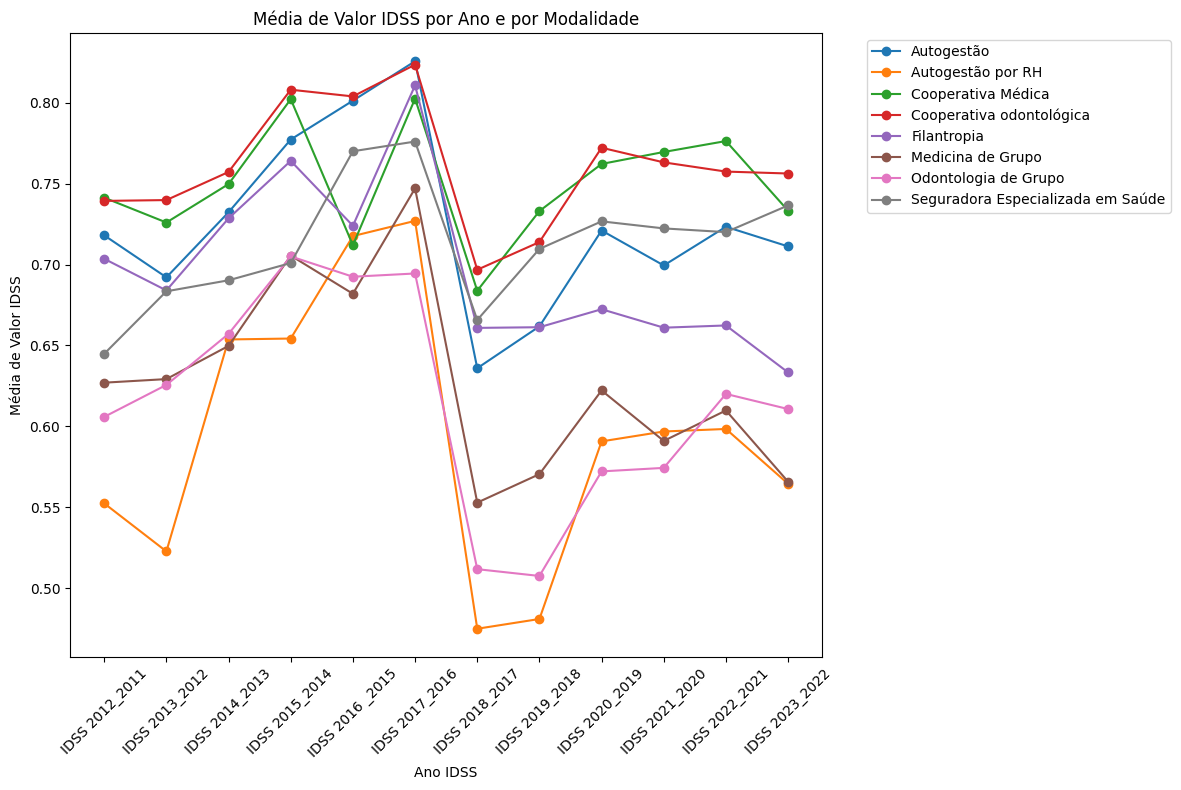

In [21]:
# Selecionar as colunas de IDSS por ano
cols_idss = ['IDSS 2012_2011', 'IDSS 2013_2012', 'IDSS 2014_2013', 'IDSS 2015_2014',
             'IDSS 2016 _2015', 'IDSS 2017_2016', 'IDSS 2018_2017', 'IDSS 2019_2018',
             'IDSS 2020_2019', 'IDSS 2021_2020', 'IDSS 2022_2021', 'IDSS 2023_2022']

# Calcular a média das colunas de IDSS por ano agrupadas pela coluna 'Modalidade'
mean_idss_by_modalidade = df_idss.groupby('Modalidade')[cols_idss].mean()

# Configurar o gráfico de linhas
plt.figure(figsize=(12, 8))  # Tamanho da figura

# Iterar sobre cada 'Modalidade' e plotar as linhas correspondentes
for modalidade in mean_idss_by_modalidade.index:
    plt.plot(cols_idss, mean_idss_by_modalidade.loc[modalidade], marker='o', linestyle='-', label=modalidade)

# Adicionar rótulos e título
plt.xlabel('Ano IDSS')
plt.ylabel('Média de Valor IDSS')
plt.title('Média de Valor IDSS por Ano e por Modalidade')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Adicionar legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Maiores operadoras do país 
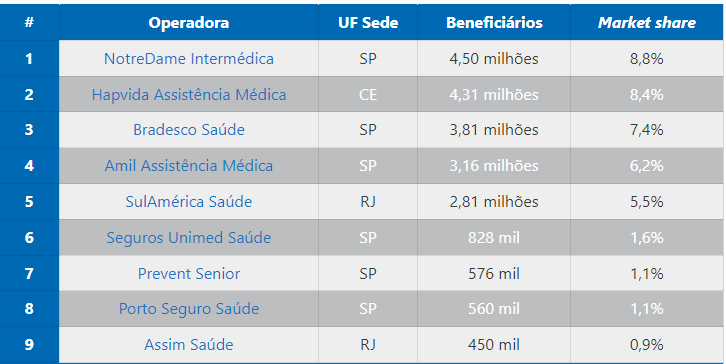

In [22]:
# Lista de operadoras com mais beneficiários para usar como filtro
operadora_list = [
    'NOTRE DAME INTERM',
    'Hapvida',
    'Bradesco',
    'Amil Assist',
    'SulAmérica servi',
    'Unimed seguros',
    'PREVENT SENIOR CORPORATE',
    'PORTO SEGURO - SEGURO',
    'GRUPO HOSPITALAR DO RIO DE JANEIRO'
]

# Criar um padrão regex para correspondência parcial
pattern = '|'.join(operadora_list)

# Filtrar o DataFrame
filtered_df_popular = df_cleaned[df_cleaned['Razao Social'].str.contains(pattern, regex=True, case=False)]

In [23]:
# Selecionar apenas as colunas desejadas
filtered_df_popular = filtered_df_popular[['CNPJ', 'Razao Social', 'Modalidade', 'IDSS 2023_2022']]
# Ordenar do maior para o menor com base na coluna 'IDSS 2023_2022'
filtered_df_popular = filtered_df_popular.sort_values(by='IDSS 2023_2022', ascending=False)

### Notas das maiores Operadoras
###### obs: A razão social da Assim é "Grupo hospitalar do Rio de Janeiro"

In [24]:
filtered_df_popular

,CNPJ,Razao Social,Modalidade,IDSS 2023_2022
10,92.693.118/0001-60,BRADESCO SAÚDE S.A.,Seguradora Especializada em Saúde,1.0000
834,44.649.812/0001-38,NOTRE DAME INTERMÉDICA SAÚDE S.A.,Medicina de Grupo,1.0000
7,04.487.255/0001-81,UNIMED SEGUROS SAÚDE S/A,Seguradora Especializada em Saúde,0.9238
6,04.540.010/0001-70,PORTO SEGURO - SEGURO SAÚDE S/A,Seguradora Especializada em Saúde,0.8108
933,63.554.067/0001-98,HAPVIDA ASSISTENCIA MEDICA LTDA,Medicina de Grupo,0.8020
126,31.925.548/0001-76,GRUPO HOSPITALAR DO RIO DE JANEIRO LTDA,Medicina de Grupo,0.7923
1812,15.011.651/0001-54,BRADESCO SAÚDE - OPERADORA DE PLANOS S/A,Medicina de Grupo,0.7611
363,29.309.127/0001-79,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,Medicina de Grupo,0.7144
1414,04.234.059/0001-03,PREVENT SENIOR CORPORATE OPERADORA DE SAÚDE LTDA.,Medicina de Grupo,0.4405
